In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import pandas as pd
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D

In [2]:
#Directory to dataset in drive
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)



Mounted at /content/drive


In [3]:
image_size = (64,64)
batch_size = 32
#dataset_path ='/content/gdrive/MyDrive/Colab-Notebooks/Pistachio_Image_Dataset'
#Data Generators 
train_gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_g = train_gen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/Catsanddogs/cats-and-dogs/training_set',
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "binary")

test_datagen = ImageDataGenerator(rescale = 1./255)

val_g = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/Catsanddogs/cats-and-dogs/test_set/test_set',
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "binary")


Found 8015 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


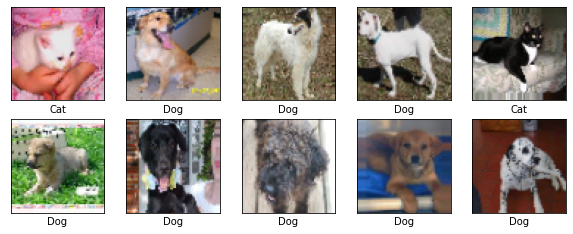

In [4]:
#Verify data
class_names = ['Cat', 'Dog']
img,lab = next(train_g)

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[i])
    plt.xlabel(class_names[lab[i].astype('int32')])
plt.show()

In [5]:
#create model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [ ]:
history = model.fit_generator(train_g,
                              steps_per_epoch=100,
                              epochs=10,
                              verbose=1,
                              validation_data=val_g)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
100/100 [==============================] - 1822s 18s/step - loss: 0.7397 - accuracy: 0.5159 - val_loss: 0.6994 - val_accuracy: 0.4993
Epoch 2/10
100/100 [==============================] - 511s 5s/step - loss: 0.6804 - accuracy: 0.5587 - val_loss: 0.6439 - val_accuracy: 0.6391
Epoch 3/10
100/100 [==============================] - 296s 3s/step - loss: 0.6500 - accuracy: 0.6294 - val_loss: 0.6410 - val_accuracy: 0.6199
Epoch 4/10
100/100 [==============================] - 197s 2s/step - loss: 0.6443 - accuracy: 0.6290 - val_loss: 0.6168 - val_accuracy: 0.6515
Epoch 5/10
100/100 [==============================] - 134s 1s/step - loss: 0.5993 - accuracy: 0.6730 - val_loss: 0.5779 - val_accuracy: 0.7054
Epoch 6/10
100/100 [==============================] - 106s 1s/step - loss: 0.5785 - accuracy: 0.6893 - val_loss: 0.5571 - val_accuracy: 0.7158
Epoch 7/10


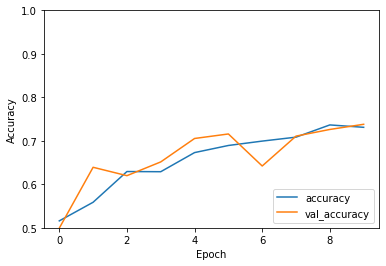

In [15]:
#Evaluate the model
'''import matplotlib.pyplot as plt
acc= history.history ['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss= history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo', label='Training acc')
plt.plot(epochs,val_acc,'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.show()
'''
import matplotlib.pyplot as plt
acc = history.history ['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [16]:
test_loss, test_acc = model.evaluate(val_g, verbose=2)

print(test_acc)

64/64 - 13s - loss: 0.5162 - accuracy: 0.7380 - 13s/epoch - 200ms/step
0.7380128502845764
